<a href="https://colab.research.google.com/github/romadungarwal/Notebook1/blob/main/Roma_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction

<table class="tfo-notebook-buttons" align="left">
  
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/pantelis/PRML/blob/master/notebooks/ch01_Introduction.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
# You need to adjust the directory names below for your own account
# e.g. you may elect to create ms-notebooks dir or not

# Execute this cell once

# 1. Download the repo and set it as the current directory
%cd /content/drive/My Drive/Colab Notebooks/ml-notebooks
!git clone https://github.com/pantelis/PRML
%cd /content/drive/My Drive/Colab Notebooks/ml-notebooks/PRML

# 2. install the project/module
!python setup.py install



/content/drive/My Drive/Colab Notebooks/ml-notebooks
fatal: destination path 'PRML' already exists and is not an empty directory.
/content/drive/My Drive/Colab Notebooks/ml-notebooks/PRML
running install
running bdist_egg
running egg_info
writing prml.egg-info/PKG-INFO
writing dependency_links to prml.egg-info/dependency_links.txt
writing requirements to prml.egg-info/requires.txt
writing top-level names to prml.egg-info/top_level.txt
writing manifest file 'prml.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/prml
copying build/lib/prml/__init__.py -> build/bdist.linux-x86_64/egg/prml
creating build/bdist.linux-x86_64/egg/prml/bayesnet
copying build/lib/prml/bayesnet/discrete.py -> build/bdist.linux-x86_64/egg/prml/bayesnet
copying build/lib/prml/bayesnet/probability_function.py -> build/bdist.linux-x86_64/egg/prml/bayesnet
copying build/lib/prm

In [ ]:
# 3. Add the project directory to the path
%cd /content/drive/My Drive/Colab Notebooks/ml-notebooks/PRML
import os, sys
sys.path.append(os.getcwd())

/content/drive/My Drive/Colab Notebooks/ml-notebooks/PRML


In [28]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()


In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from prml.preprocess import PolynomialFeature
from prml.linear import (
    LinearRegression,
    RidgeRegression,
    BayesianRegression
)

np.random.seed(1234)

## 1.1. Example: Polynomial Curve Fitting

The cell below defines $p_{data}(y|x)$ and generates the $\hat p_{data}(y|x)$

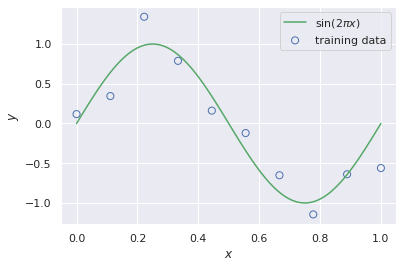

In [30]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size) # p(x)
    y = func(x) + np.random.normal(scale=std, size=x.shape) 
    return x, y

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

The loss function is called Root mean squared error (RMSE), as RMSE is minimized to determine the weights of the parameters. 
The RMSE is a preferred loss function for sample with low outliers, given it would give more weight to outliers which would result in biased weights. For sample with outliers, Mean absolute error (MAE) could be used as a loss function

Squared norm value increases with increase in complexity

M 1 =     Weights
0  0.783019
1 -1.637881
sqred_norm m 1 = 1.8154261903411646
M 3 =      Weights
0   0.011334
1   9.292162
2 -26.789442
3  17.037287
sqred_norm m 3 = 33.08002027112504
M 6 =       Weights
0    0.087038
1   -2.363049
2   94.522862
3 -428.174943
4  736.797688
5 -563.095549
6  161.694460
sqred_norm m 6 = 1038.4442562233153
M 9 =         Weights
0      0.117859
1    -32.231429
2    552.576193
3  -2728.573324
4   4762.784302
5   2031.288861
6 -19359.536517
7  28382.470704
8 -17856.184235
9   4246.726916
sqred_norm m 9 = 39392.84253289236


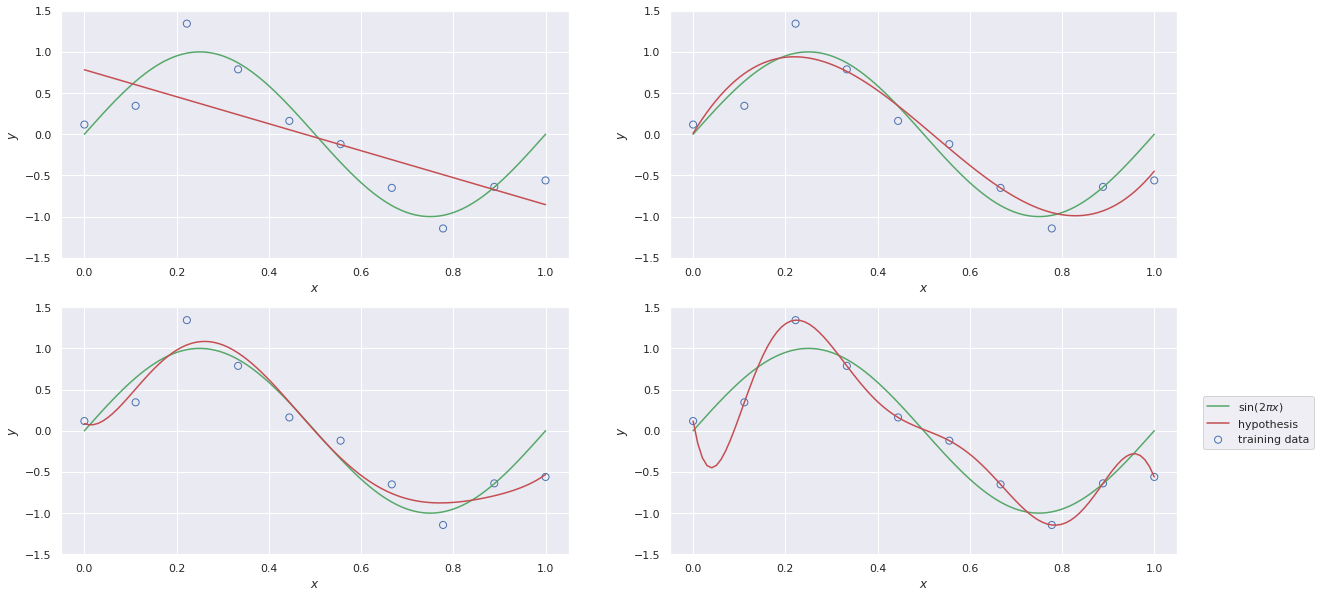

In [100]:
import pandas as pd
from numpy.linalg import norm 
plt.subplots(figsize=(20, 10))
for i, degree in enumerate([1, 3, 6, 9]):
    plt.subplot(2, 2, i + 1)
    feature = PolynomialFeature(degree)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)
  
    norm_table = pd.DataFrame(model.w,)
    norm_table.columns = ['Weights']
    print("M", degree,"=",norm_table)

    print("sqred_norm", "m",degree,"=",norm(model.w))
    

    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
    plt.plot(x_test, y, c="r", label="hypothesis")
    plt.ylim(-1.5, 1.5)
    
    
    plt.annotate("M={}".format(degree), xy=(-0.15, 1))
    plt.xlabel('$x$')
    plt.ylabel('$y$') 
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()




The test error (RMSE) is large for m=9 compared to test error for m=3. For m=9, high RMSE on test sample suggests high variance in the target variable vs. m=3 model. This also suggests that m=9 model overfits on the training data (i.e.low bias and low variance on the training sample, but high variance on the test sample). To reduce variance, regularization (ridge regression) could be used for m=9 model.

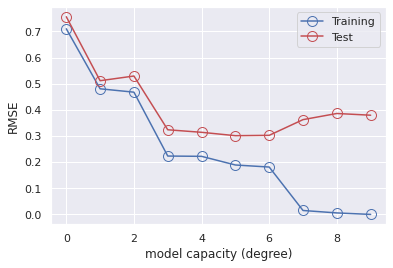

In [101]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

training_errors = []
test_errors = []

for i in range(10):
    feature = PolynomialFeature(i)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    training_errors.append(rmse(model.predict(X_train), y_train))
    test_errors.append(rmse(model.predict(X_test), y_test + np.random.normal(scale=0.25, size=len(y_test))))

plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.legend()
plt.xlabel("model capacity (degree)")
plt.ylabel("RMSE")
plt.show()

#### Regularization

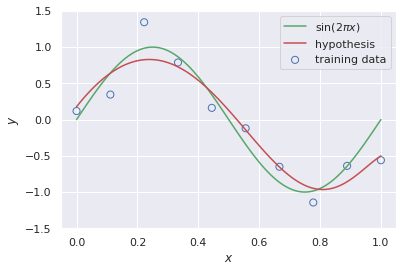

In [102]:
feature = PolynomialFeature(9)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

model = RidgeRegression(alpha=1e-3)
model.fit(X_train, y_train)
y = model.predict(X_test)

#y = model.predict(X_test)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="hypothesis")
plt.ylim(-1.5, 1.5)
plt.legend()
plt.annotate("M=9", xy=(-0.15, 1))
plt.xlabel('$x$')
plt.ylabel('$y$') 
plt.show()

In linear regression, we observed that the variance increases and bias decreases with increase in model complexity. This resulted in overfitting in models with high compexity. With regularization (i.e., Ridge regression), we included a small bias in the weights in terms of hyperparameters that resulted in decrease in variance. This therefore resulted in decrease in RMSE of the test sample, thus reducing overfitting

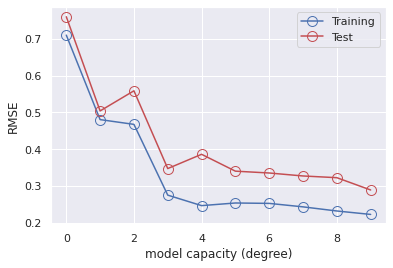

In [103]:
# RMSE vs complexity with regularization
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

training_errors = []
test_errors = []

for i in range(10):
    feature = PolynomialFeature(i)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = RidgeRegression(alpha=1e-3)
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    training_errors.append(rmse(model.predict(X_train), y_train))
    test_errors.append(rmse(model.predict(X_test), y_test + np.random.normal(scale=0.25, size=len(y_test))))

plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.legend()
plt.xlabel("model capacity (degree)")
plt.ylabel("RMSE")
plt.show()



### 1.2.6 Bayesian curve fitting

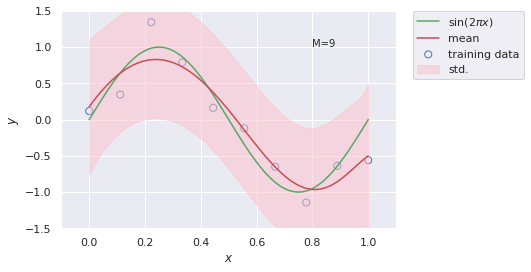

In [104]:
model = BayesianRegression(alpha=2e-3, beta=2)
model.fit(X_train, y_train)

y, y_err = model.predict(X_test, return_std=True)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="mean")
plt.fill_between(x_test, y - y_err, y + y_err, color="pink", label="std.", alpha=0.5)
plt.xlim(-0.1, 1.1)
plt.ylim(-1.5, 1.5)
plt.annotate("M=9", xy=(0.8, 1))
plt.xlabel('$x$')
plt.ylabel('$y$') 
plt.legend(bbox_to_anchor=(1.05, 1.), loc=2, borderaxespad=0.)
plt.show()